In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
img_names = ['sunset', 'flower', 'house', 'leaf']
new_images = []
for img_name in img_names:
    
    file_name = img_name + 'small.jpg'
    img = cv2.imread(os.path.join('images', file_name))
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    ori_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    new_images = new_images + [img_output, ori_img]

For color image, convert to YUV, apply histogram equalization, then convert back: https://stackoverflow.com/a/38312281/3820738

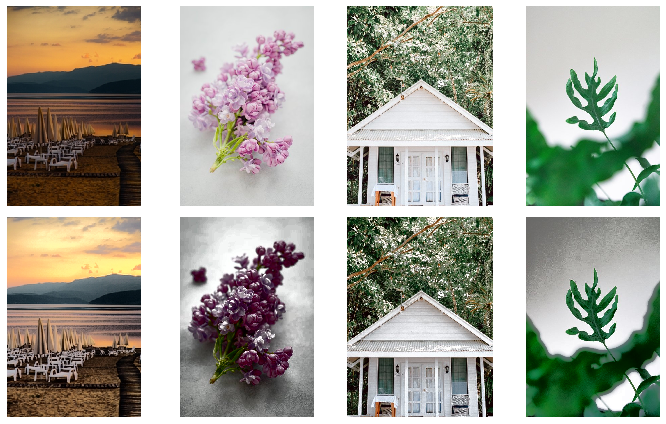

In [3]:
columns = 4
rows = 2
fig = plt.figure(figsize=(10, 6))
# titles= ["Original", "Histrogram Equalization"]
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if i<4:
        plt.imshow(new_images[2*i+1])
    else:
        plt.imshow(new_images[2*i-8])
    plt.axis("off")
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join('out-images', "all-histogramequalizations"), dpi=300)

Q: Why are there difference between original image when read in with cv2 (OpenCV) vs Pillow (Image.open)?

A: While reading a JPEG image, `image_np` and `image_cv` may be little difference because the libjpeg verison mat be different in OpenCV and Pillow.
https://stackoverflow.com/a/55096766/3820738